# __Image Classification Using CNN__

Let's see a working example of training a convolutional neural network (CNN) on a dataset of flower images.

## Steps to Be Followed:

1. Importing the necessary libraries and dataset
2. Counting and retrieving the images
3. Creating a training dataset
4. Creating a validation dataset
5. Visualizing a subset of images from the training dataset
6. Preprocessing and normalizing the training dataset
7. Creating a convolutional neural network model with data augmentation
8. Summarizing and compiling the model
9. Training the model
10. Visualizing the result
11. Predicting the class of a given image

### Step 1: Importing the Necessary Libraries and Dataset
- Import the required libraries
- Import the given dataset using given link

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL # python imaging library
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
#only for mac or when you get an ssl warning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #deactivate SSL Cert Error


In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


### Step 2: Counting and Retrieving the Images
- Count the number of images in the directory specified by **data_dir** and print the count
- Retrieve the file paths of the images in the **roses** subdirectory and display the first two images
- Retrieve the file paths of the images in the __tulips__ subdirectory and display the first image

In [4]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('/Users/bassel_instructor/.keras/datasets/flower_photos/r

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))


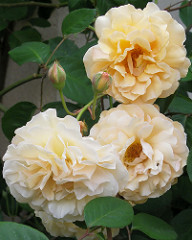

In [7]:
PIL.Image.open(roses[5])

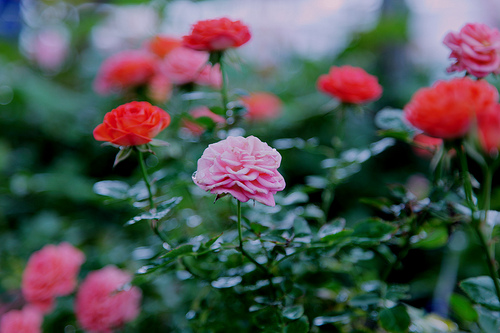

In [8]:
PIL.Image.open(roses[1])

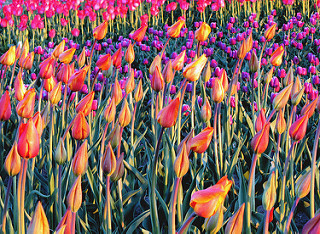

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

### Step 3: Creating a Training Dataset
- Set the batch size, image height, and image width variables
- Create a training dataset using **tf.keras.utils.image_dataset_from_directory()** function, passing the following parameters:
  - __data_dir:__ The directory containing the image dataset
  - **validation_split**: The fraction of data to reserve for validation
  - **subset**: Specify the subset of the dataset to use (in this case, training)
  - **seed**: Random seed for shuffling the data
  - **image_size**: The desired size for the images in the dataset
  - **batch_size**: The number of samples per batch


In [10]:
batch_size = 32
img_height = 180
img_width = 180


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


__Observation:__
- The **train_ds** object representing the training dataset.

### Step 4: Creating a Validation Dataset
- Create a validation dataset using **tf.keras.utils.image_dataset_from_directory()** function, passing the following parameters:
  - __data_dir:__ The directory containing the image dataset
  - **validation_split**: The fraction of data to reserve for validation
  - **subset**: Specify the subset of the dataset to use (in this case, validation)
  - **seed**: Random seed for shuffling the data
  - **image_size**: The desired size for the images in the dataset
  - **batch_size**: The number of samples per batch

In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


__Observation:__
- The __val_ds__ object representing the validation dataset.

### Step 5: Visualizing a Subset of Images from the Training Dataset
- Obtain the class names from the train_ds dataset using the class_names attribute
- Print the **class_names** to display the list of class labels
- Import the **matplotlib.pyplot** module for visualization purposes
- Create a figure with a size of 10x10 using **plt.figure(figsize=(10, 10))**
- Iterate over the first batch of images and labels in the **train_ds** dataset using **train_ds.take(1)**
- For each image in the batch (up to 9 images), create a subplot using **plt.subplot(3, 3, i + 1)**
- Display the image using **plt.imshow(images[i].numpy().astype("uint8"))**
- Set the title of the subplot to the corresponding class name using **plt.title(class_names[labels[i]])**
- Disable the axis labels for the subplot using __plt.axis("off")__

In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


2024-03-26 21:49:07.621984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


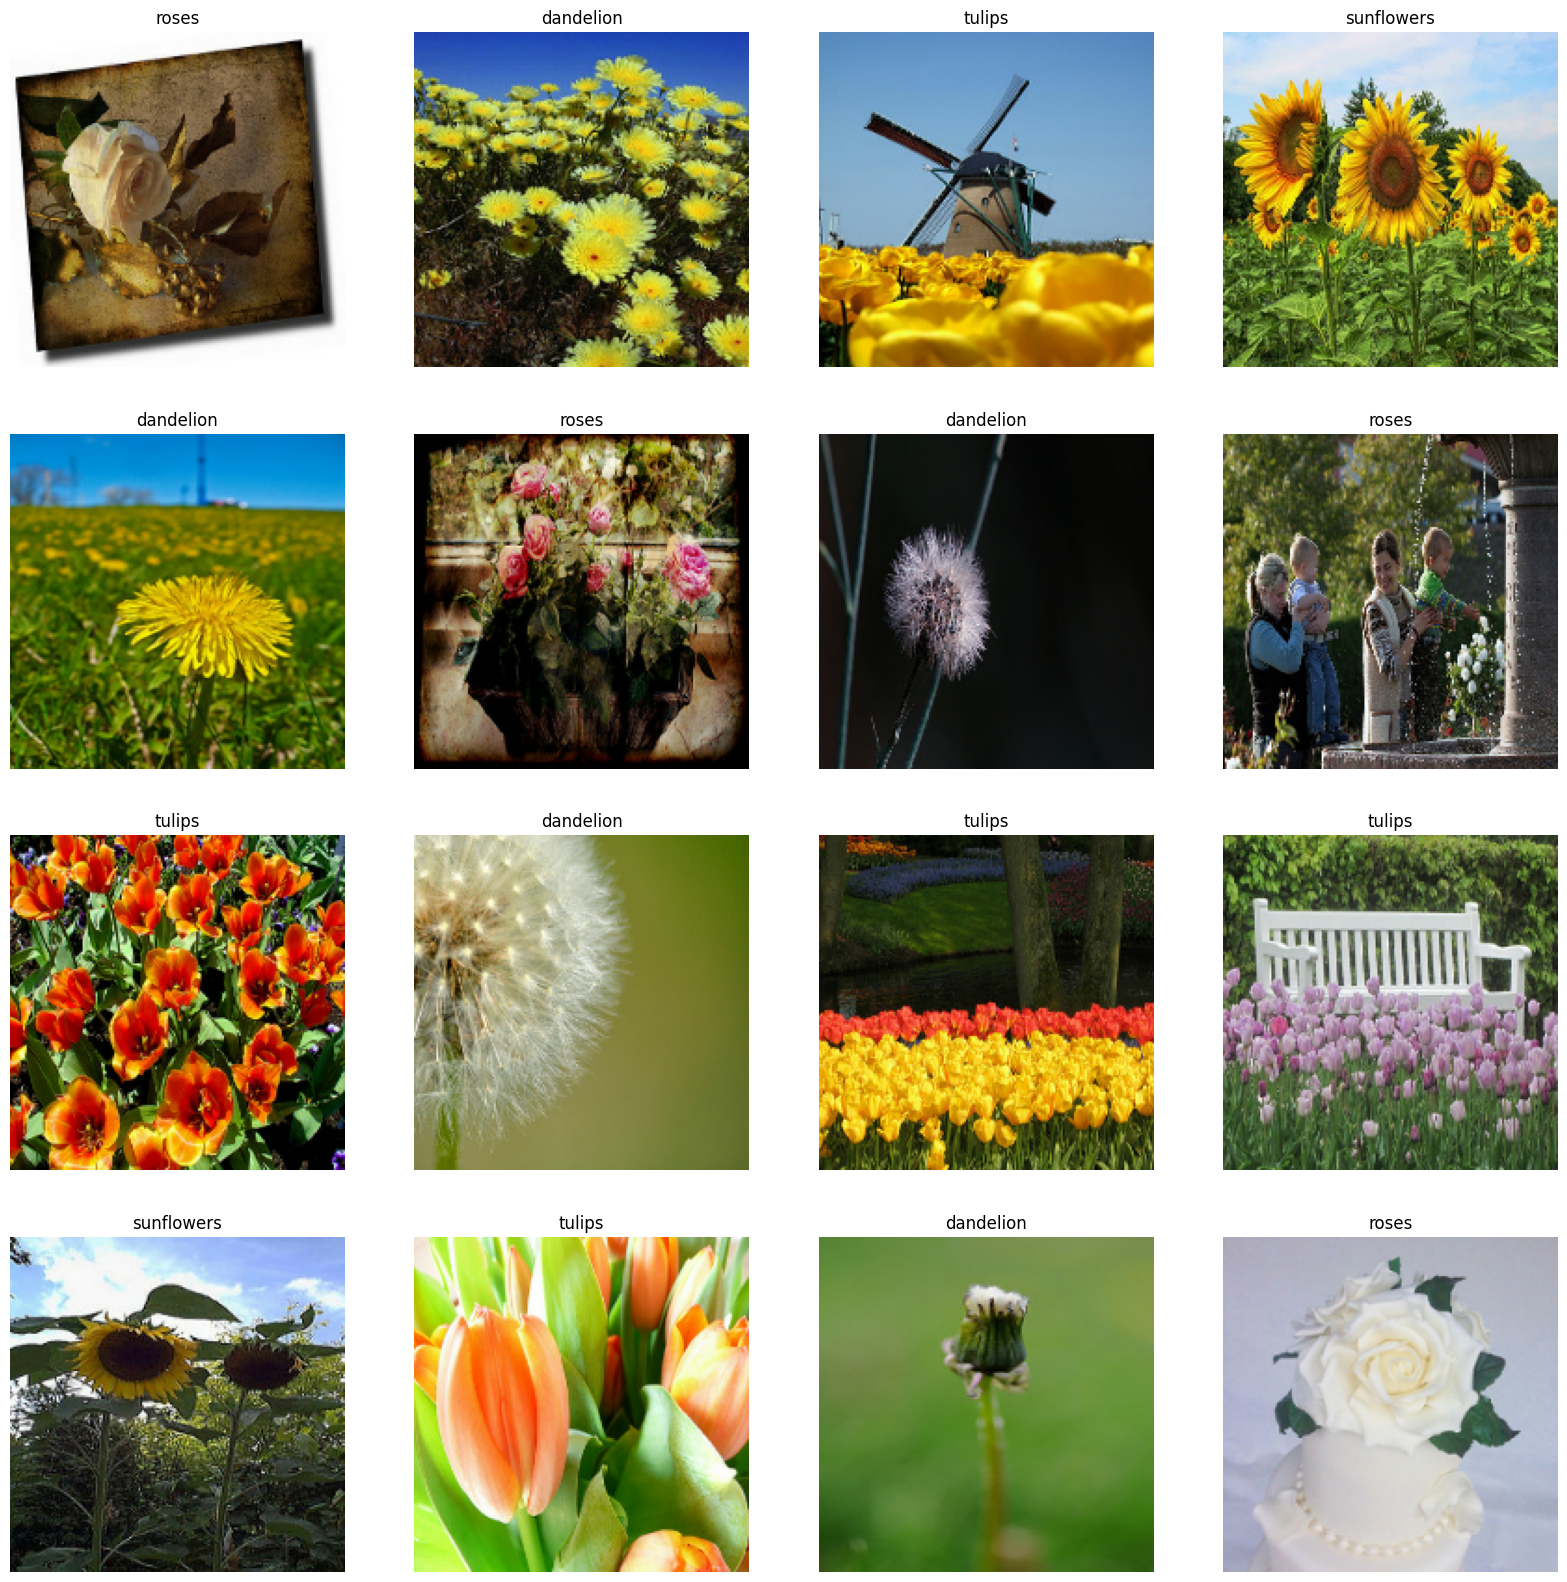

In [13]:
plt.figure(figsize=(20,20))

for img, lbl in train_ds.take(1): #cature every image and its lable
    #loop through 16 images
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_names[lbl[i]]) # standardizing the number format
        plt.axis('off')

__Observation:__
- The grid of nine subplots provides a visual representation of images from the training dataset and their respective class labels. This arrangement allows for easy comparison and analysis of the various image classes within the dataset.

### Step 6: Preprocessing and Normalizing the Training Dataset
#### Performance Optimization
- Set the value of **AUTOTUNE** to **tf.data.AUTOTUNE**
    - AUTOTUNE is a constant from TensorFlow that allows the input pipeline to automatically tune the number of parallel calls to improve performance. 
- Cache the **train_ds** dataset for improved performance by calling the **cache()** method
- Shuffle the elements of the **train_ds** dataset using a buffer size of **1000** by calling the **shuffle()** method
- Prefetch the elements of the **train_ds** dataset for improved performance by calling the **prefetch()** method with **buffer_size=AUTOTUNE**
- Cache the **val_ds** dataset for improved performance by calling the **cache()** method
- Prefetch the elements of the **val_ds** dataset for improved performance by calling the **prefetch()** method with **buffer_size=AUTOTUNE**

#### Normalization
- Create a __Rescaling__ layer to normalize the pixel values of the dataset images to the range **[0, 1]**
- Apply the __normalization_layer__ to the **train_ds** dataset using the **map()** method and **lambda** function
- Retrieve a batch of images and labels from the normalized dataset using next**(iter(normalized_ds))**
- Access the first image in the batch using **image_batch[0]**
- Print the minimum and maximum pixel values of the first image using **np.min(first_image)** and __np.max(first_image)__


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))


0.0 1.0


__Observation:__
- The range of pixel values in the normalized dataset ensures that the minimum value is 0 and the maximum value is 1 for the first image. This normalization process allows for consistent and standardized pixel values, facilitating easier comparisons and computations in subsequent analysis.

### Step 7: Data Augmentation

data_augmentation is a Keras Sequential model that defines a set of data augmentation techniques, including horizontal flipping, random rotation, and random zoom. Data augmentation is used to artificially increase the diversity of the training dataset by applying random transformations to the input images. This helps improve the generalization and robustness of the model by exposing it to different variations of the input data.
 
- Create a data augmentation pipeline using **keras.Sequential** with three augmentation layers: random horizontal flip, random rotation, and random zoom
- Determine the number of classes based on the **class_names**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

- Create a sequential model with data augmentation as the first layer and rescaling layer.
- Add convolutional layers with an increasing number of filters, 3x3 kernel, padding, and ReLU activation.
    - Three pairs of convolutional (Conv2D) and max pooling (MaxPooling2D) layers are used to extract features from the input images. The number of filters in the convolutional layers gradually increases from 16 to 32 to 64, allowing the model to learn increasingly complex features.
- Add max pooling layers after each convolutional layer.
- Add a dropout layer with a rate of **0.2**. A Dropout layer is added to reduce overfitting by randomly dropping a fraction of the neurons during training.
- The feature maps are flattened and passed through two fully connected (Dense) layers with ReLU activation functions.
- Add dense layers with ReLU activation, ending with a dense output layer.

In [ ]:
num_classes = len(class_names)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


__Observation:__
- The output of this code is a convolutional neural network model with data augmentation, suitable for image classification tasks.

### Step 8: Summarizing and Compiling the Model
- Display the summary of the model architecture and the number of parameters


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

- Compile the model with the specified optimizer, loss function, and metrics.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



__Observation:__
- The summary of the model architecture and the compiled model can be seen as output.

### Step 9: Training the Model
- Set the number of epochs to 3
- Train the model using the fit method, passing the training and validation datasets, and the number of epochs

In [ ]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
92/92 [==============================] - 11s 116ms/step - loss: 1.2641 - accuracy: 0.4527 - val_loss: 1.0952 - val_accuracy: 0.5749
Epoch 2/3
92/92 [==============================] - 10s 111ms/step - loss: 1.0155 - accuracy: 0.6069 - val_loss: 0.9786 - val_accuracy: 0.6185
Epoch 3/3
92/92 [==============================] - 10s 112ms/step - loss: 0.9131 - accuracy: 0.6403 - val_loss: 0.9380 - val_accuracy: 0.6471


__Observation:__
- The training history object provides valuable information about the training process, including the loss and accuracy values for each epoch. This object allows us to track the performance of the model over time and analyze how the loss and accuracy metrics evolve during training.

Overall, this code sets up a CNN model with data preprocessing, data augmentation, and a suitable architecture for image classification tasks. The chosen functions and techniques are common best practices in deep learning for working with image data and improving model performance and generalization.

### Step 10: Visualizing the Result
- Retrieve the accuracy and loss values from the training history
- Create a range of epochs
- Plot the training and validation accuracy in a subplot
- Plot the training and validation loss in a subplot
- Display the plotted figures

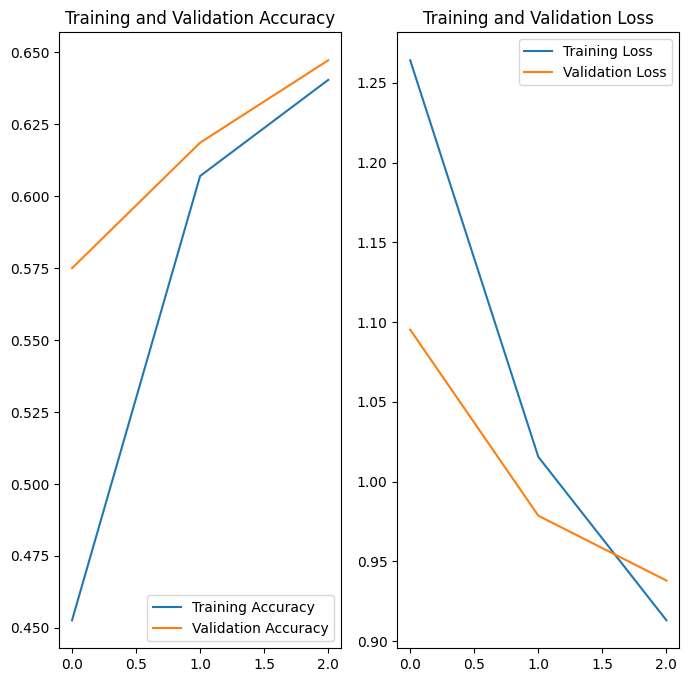

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

__Observation:__
- Two subplots displaying the training and validation accuracy, and the training and validation loss over the range of epochs.

### Step 11: Predicting the Class of a Given Image
- Define the URL of the image and download it using **tf.keras.utils.get_file()**
- Load the image and resize it to the desired target size
- Convert the image to an array and expand its dimensions to create a batch
- Make predictions on the image using the trained model
- Calculate the softmax scores and identify the class with the highest confidence
- Print the predicted class and its corresponding confidence percentage

In [ ]:

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 71ms/step
This image most likely belongs to sunflowers with a 79.07 percent confidence.


__Observation:__
- The predicted class of the image and the confidence percentage are shown as an output.

In [ ]:
PIL.Image(predictions[0])

NameError: name 'PIL' is not defined